In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.python import pywrap_tensorflow

import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import sgld_tf

from multiprocessing import Pool

import warnings
warnings.filterwarnings("ignore")

Instructions for updating:
Use the retry module or similar alternatives.


/home/henripal/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
sgd, sgd_stdevs = sgld_tf.analyze_directory('/tmp/tf/sgd/')

['dense_1/kernel', 'dense_1/bias', 'dense/bias', 'conv2d/bias', 'conv2d/kernel', 'conv2d_1/kernel', 'conv2d_1/bias', 'dense/kernel']
hist shape:  (508, 3274634)
max std:  0.00484904


In [3]:
sgld, sgld_stdevs = sgld_tf.analyze_directory('/tmp/tf/sgld/')

['dense_1/kernel', 'dense_1/bias', 'dense/bias', 'conv2d/bias', 'conv2d/kernel', 'conv2d_1/kernel', 'conv2d_1/bias', 'dense/kernel']
hist shape:  (510, 3274634)
max std:  0.0287676


In [4]:
psgld, psgld_stdevs = sgld_tf.analyze_directory('/tmp/tf/psgld/')

['conv2d_1/bias', 'conv2d/kernel', 'conv2d/bias', 'dense/bias', 'dense/kernel', 'conv2d_1/kernel', 'dense_1/kernel', 'dense_1/bias']
hist shape:  (510, 3274634)
max std:  0.0307595


In [5]:
ksgld, ksgld_stdevs = sgld_tf.analyze_directory('/tmp/tf/ksgld/')

['dense_1/bias', 'dense/kernel', 'dense/bias', 'dense_1/kernel', 'conv2d_1/kernel', 'conv2d/bias', 'conv2d/kernel', 'conv2d_1/bias']
hist shape:  (515, 3274634)
max std:  0.0332077


In [6]:
sgd_mess = sgld_tf.split_mess(sgd, 5, 100)
sgld_mess = sgld_tf.split_mess(sgld, 5, 100)
psgld_mess = sgld_tf.split_mess(psgld, 5, 100)
ksgld_mess = sgld_tf.split_mess(ksgld, 5, 100)

split:  0
percentage of finite:  0.99318061194
(2.6756070568322379, 5.0475333766047195)
split:  1
percentage of finite:  0.988038663252
(2.6273241713823774, 3.9275118837696974)
split:  2
percentage of finite:  0.988514136236
(2.6295964125560536, 4.1998649229006926)
split:  3
percentage of finite:  0.988406032552
(2.6631585702367966, 4.4172248754846217)
split:  4
percentage of finite:  0.988836615023
(2.641733452062927, 4.5536075263446687)
split:  0
percentage of finite:  1.0
(3.1010006764659939, 5.420887399526217)
split:  1
percentage of finite:  1.0
(3.1094343604602743, 5.4188308562601319)
split:  2
percentage of finite:  1.0
(3.1045892661244832, 5.4136631844344469)
split:  3
percentage of finite:  1.0
(3.1030060821174819, 5.3707828654079401)
split:  4
percentage of finite:  1.0
(3.109189703082782, 5.4240821085196327)
split:  0
percentage of finite:  1.0
(3.0960971979409679, 5.4133632118403154)
split:  1
percentage of finite:  1.0
(3.1017092186919166, 5.4155506947929908)
split:  2
per

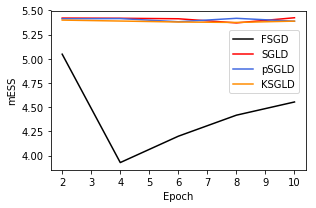

In [61]:
plt.figure(figsize=(4.5, 3))
plt.plot([y for x, y in sgd_mess], label="FSGD", color='black')
plt.plot([y for x, y in sgld_mess], label="SGLD", color='red')
plt.plot([y for x, y in psgld_mess], label="pSGLD", color='royalblue')
plt.plot([y for x, y in ksgld_mess], label="KSGLD", color='darkorange')
plt.xlabel('')
plt.xticks(np.arange(0, 4.5, .5), np.arange(2, 11))
plt.xlabel('Epoch')
plt.ylabel('mESS')
plt.tight_layout()
plt.legend(loc=(.7, .48))
plt.savefig('../../overleaf/img/ess.eps')